## EDA Project 2 on Diabetes Dataset

In [1]:
#importing the neccesary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [64]:
df=pd.read_csv("E:\Sankhyana Training\Datasets/Diabetes Data.csv")
df.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    int64  
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [5]:
df.Class.value_counts()

0    500
1    268
Name: Class, dtype: int64

In [6]:
df.isnull().sum()

Pregnant               0
Glucose                5
Diastolic_BP          35
Skin_Fold            227
Serum_Insulin        374
BMI                   11
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [7]:
#droping null values for columns with lesser missing values
df_cleaned= df.dropna(subset=['Glucose','Diastolic_BP','BMI'])
df_cleaned.isnull().sum()

Pregnant               0
Glucose                0
Diastolic_BP           0
Skin_Fold            192
Serum_Insulin        332
BMI                    0
Diabetes_Pedigree      0
Age                    0
Class                  0
dtype: int64

In [8]:
# Imputation (Replacing the null vlues with mean mode or median)
from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy='median')

column_to_impute=['Skin_Fold','Serum_Insulin']

df_cleaned[column_to_impute]=imputer.fit_transform(df_cleaned[column_to_impute])



C:\Users\Alvine\AppData\Local\Temp\ipykernel_3500\2100364280.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column_to_impute]=imputer.fit_transform(df_cleaned[column_to_impute])


In [9]:
df_cleaned.isnull().mean()

Pregnant             0.0
Glucose              0.0
Diastolic_BP         0.0
Skin_Fold            0.0
Serum_Insulin        0.0
BMI                  0.0
Diabetes_Pedigree    0.0
Age                  0.0
Class                0.0
dtype: float64

In [10]:
df_cleaned.shape

(724, 9)

In [11]:
df_cleaned.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,125.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.5,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [12]:
import warnings
warnings.simplefilter('ignore')

In [13]:
#Changing the datataypes of three colums
lst= ['Pregnant', 'Age' ,'Class']
df_cleaned[lst] =df_cleaned[lst] .astype('float')
df_cleaned.dtypes

Pregnant             float64
Glucose              float64
Diastolic_BP         float64
Skin_Fold            float64
Serum_Insulin        float64
BMI                  float64
Diabetes_Pedigree    float64
Age                  float64
Class                float64
dtype: object

# Visualization 

In [14]:
df_cleaned.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6.0,148.0,72.0,35.0,125.5,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,125.5,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.0,125.5,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0


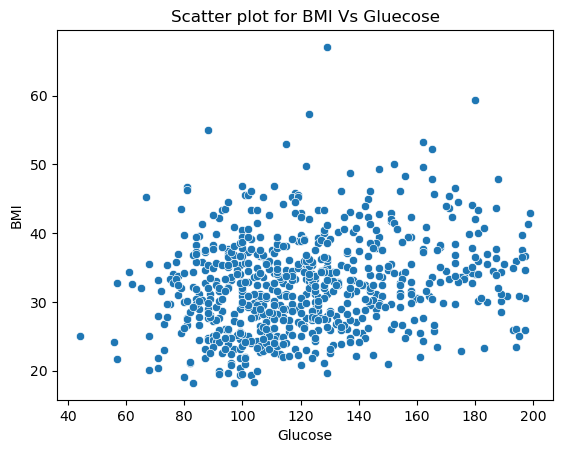

In [15]:
sns.scatterplot(x= 'Glucose', y='BMI', data=df_cleaned)
plt.title("Scatter plot for BMI Vs Gluecose")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.show()

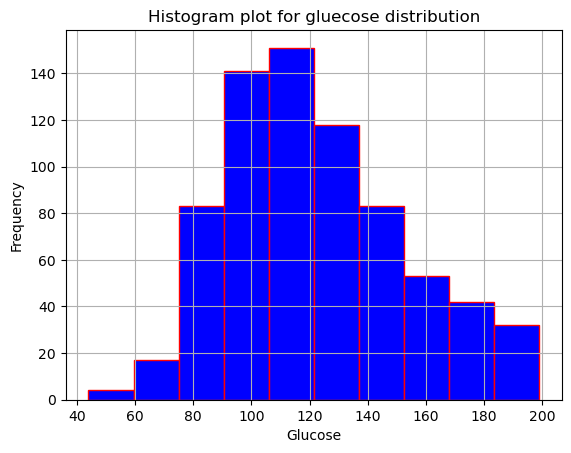

<Figure size 1000x600 with 0 Axes>

In [16]:
plt.hist(df_cleaned['Glucose'], bins=10, color= 'b', edgecolor='r')
plt.title("Histogram plot for gluecose distribution")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

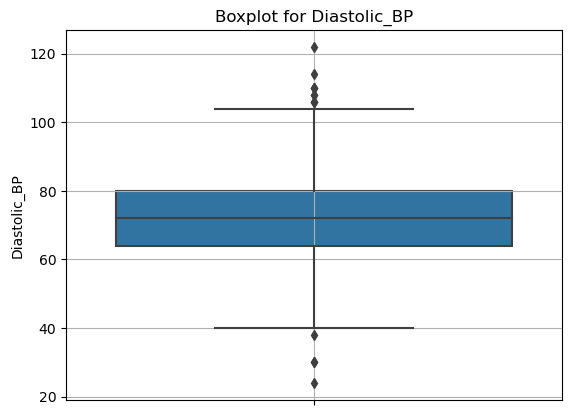

<Figure size 1000x600 with 0 Axes>

In [66]:
sns.boxplot(y='Diastolic_BP', data=df)
plt.title("Boxplot for Diastolic_BP")
plt.ylabel("Diastolic_BP")
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

In [ ]:
sns.boxplot(y='Age', data=df_cleaned)
plt.title("Boxplot for BMI")
plt.ylabel("BMI")
plt.grid(True)
plt.figure(figsize=(10, 6))
plt.show()

In [20]:
#Changing the datataypes of three colums
lst= ['BMI']
df_cleaned[lst] =df_cleaned[lst] .astype('int')
df_cleaned.dtypes

Pregnant             float64
Glucose              float64
Diastolic_BP         float64
Skin_Fold            float64
Serum_Insulin        float64
BMI                    int32
Diabetes_Pedigree    float64
Age                  float64
Class                float64
dtype: object

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           724 non-null    float64
 1   Glucose            724 non-null    float64
 2   Diastolic_BP       724 non-null    float64
 3   Skin_Fold          724 non-null    float64
 4   Serum_Insulin      724 non-null    float64
 5   BMI                724 non-null    int32  
 6   Diabetes_Pedigree  724 non-null    float64
 7   Age                724 non-null    float64
 8   Class              724 non-null    float64
dtypes: float64(8), int32(1)
memory usage: 53.7 KB


In [81]:
def removing_outliers (df, column):
    Q1 = df[column].quantile(0.25) # calculating the lower quatile
    Q3 = df[column].quantile(0.75) #calculating the upper quatile
    IQR = Q3 - Q1  # Calculating the IQR
    lower_bound = Q1 - 1.5 * IQR #This calculates the lower bound for detecting outliers.
    upper_bound = Q3 + 1.5 * IQR #This calculates the upper bound for detecting outliers.
    # Filtering Outliers
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
# Removing outliers from the 'BMI' column
df = removing_outliers( df, 'Diastolic_BP' )

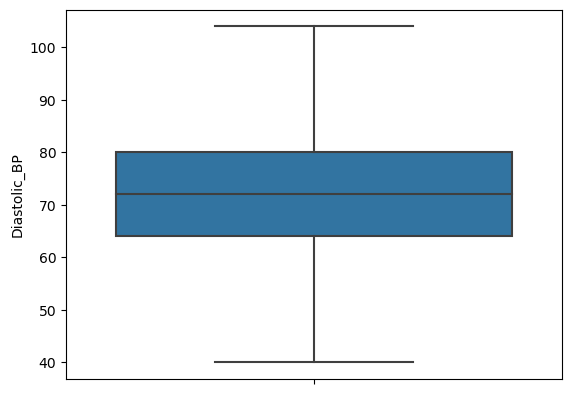

In [82]:
sns.boxplot(y='Diastolic_BP', data=df)
plt.show()

In [78]:
df_cleaned.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


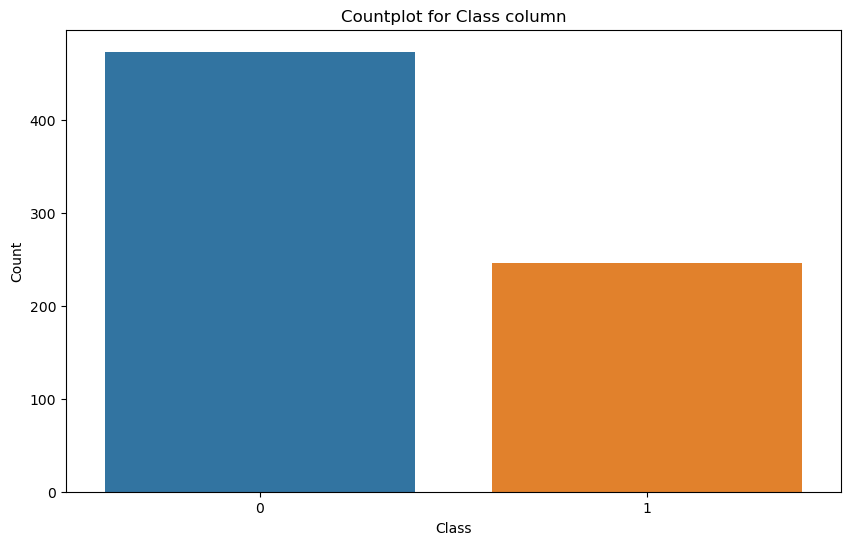

In [77]:
plt.figure(figsize=(10, 6))
sns.countplot(x= 'Class', data=df_cleaned)
plt.title("Countplot for Class column")
plt.ylabel("Count")
plt.xlabel("Class")
plt.show()

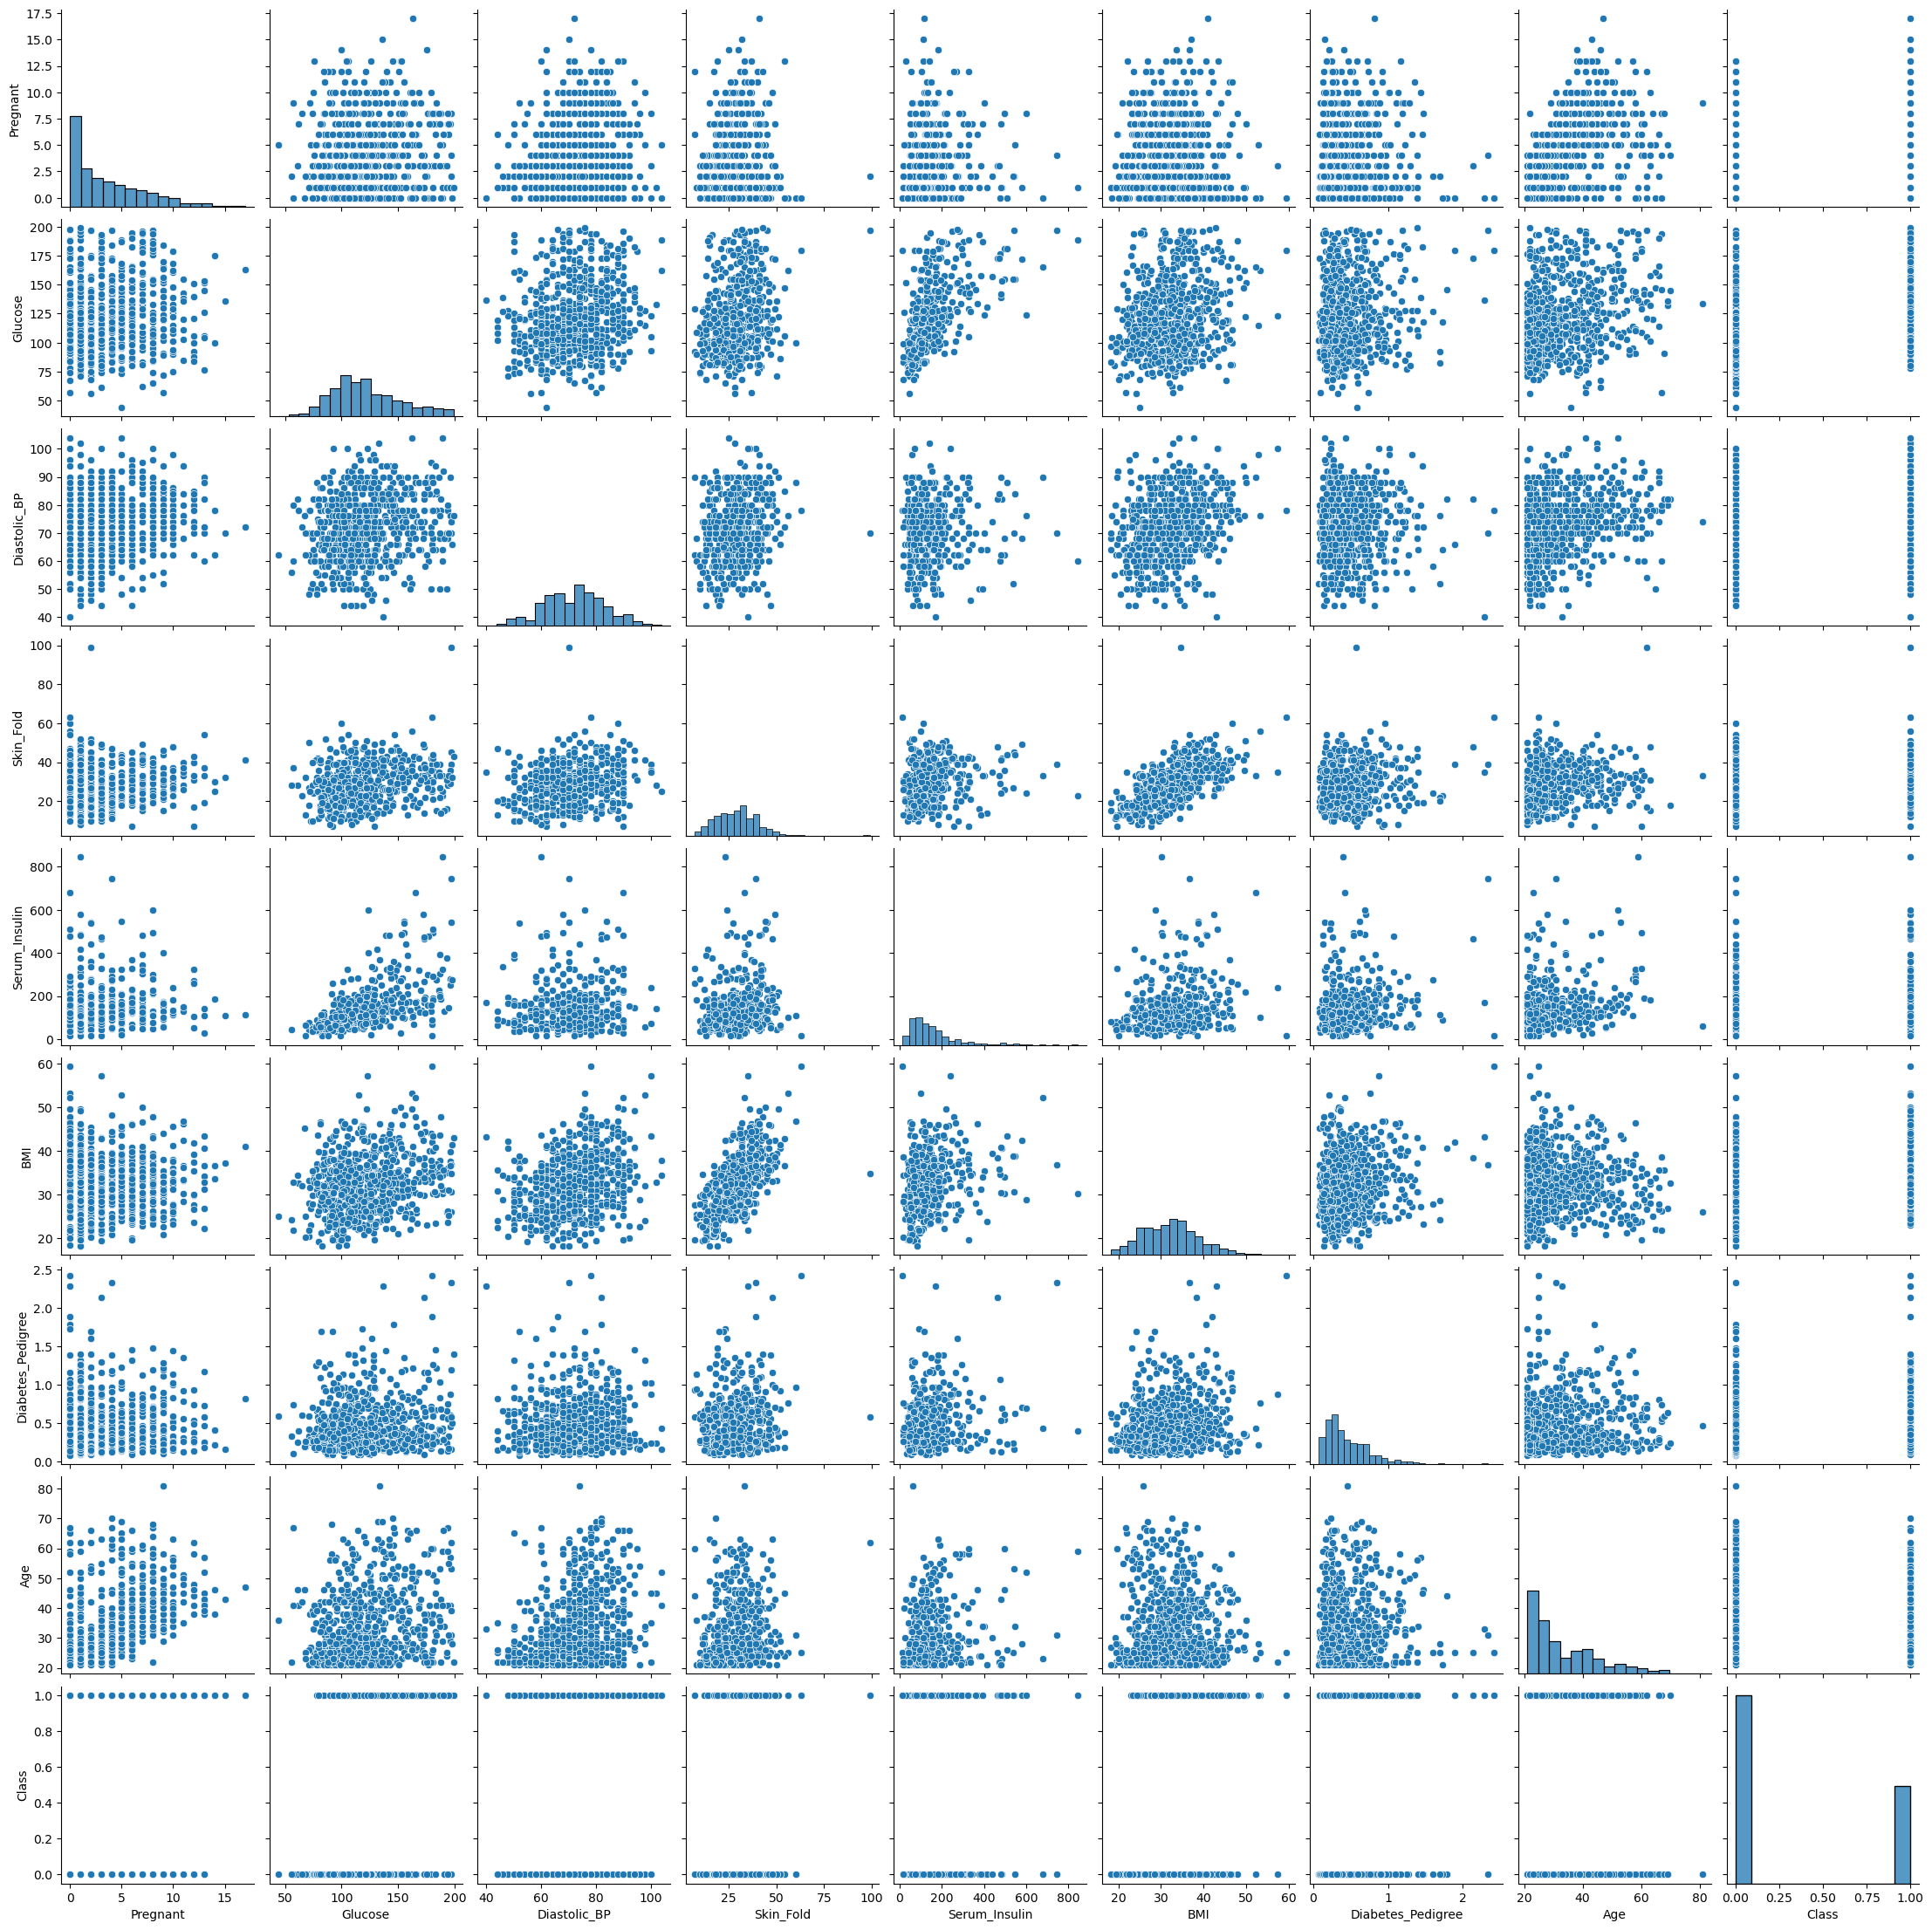

In [79]:
sns.pairplot(df_cleaned)
plt.show()

In [83]:
df_cleaned.head()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
Pregnant,1.000000,0.129061,0.188676,0.104454,0.077944,0.009878,-0.026505,0.554116,0.230601
Glucose,0.129061,1.000000,0.215390,0.227926,0.576937,0.230424,0.133902,0.264017,0.488605
Diastolic_BP,0.188676,0.215390,1.000000,0.235404,0.083833,0.297554,0.012876,0.323592,0.172952
Skin_Fold,0.104454,0.227926,0.235404,1.000000,0.185296,0.653063,0.123858,0.166407,0.252766
Serum_Insulin,0.077944,0.576937,0.083833,0.185296,1.000000,0.244831,0.128641,0.218356,0.301225
BMI,0.009878,0.230424,0.297554,0.653063,0.244831,1.000000,0.172828,0.015026,0.289989
Diabetes_Pedigree,-0.026505,0.133902,0.012876,0.123858,0.128641,0.172828,1.000000,0.024291,0.181820
Age,0.554116,0.264017,0.323592,0.166407,0.218356,0.015026,0.024291,1.000000,0.252746
Class,0.230601,0.488605,0.172952,0.252766,0.301225,0.289989,0.181820,0.252746,1.000000


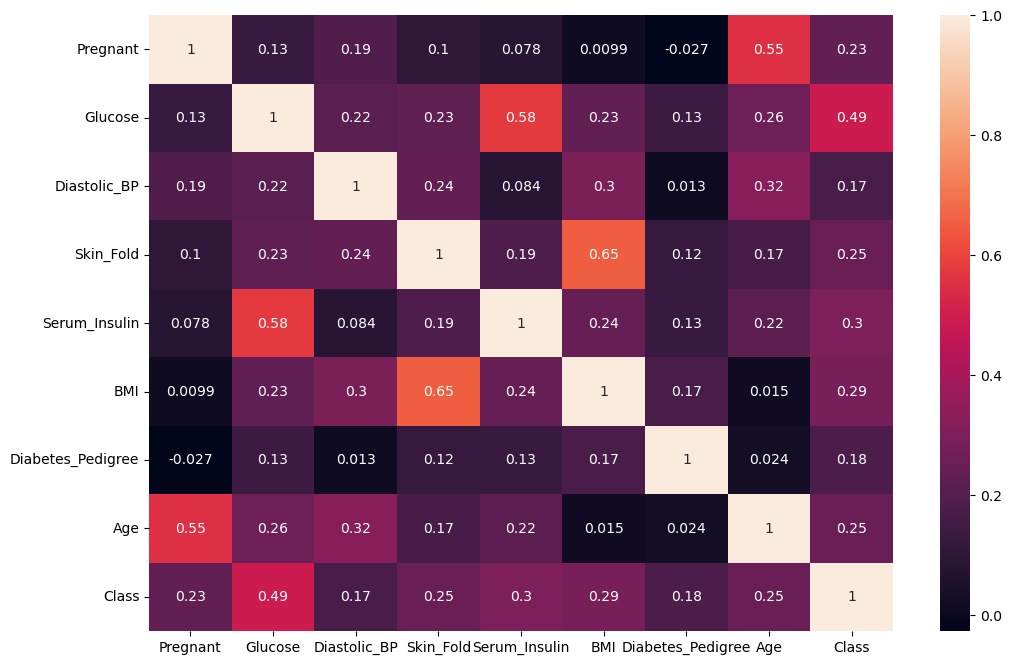

In [84]:
plt.figure(figsize = (12,8))
corrlist = ['Pregnant', 'Glucose', 'Diastolic_BP', 'Skin_Fold','Serum_Insulin',
            'BMI', 'Diabetes_Pedigree','Age', 'Class' ]
corrMatx = df_cleaned[corrlist].corr()
sns.heatmap(corrMatx,annot=True)
corrMatx